### 1. Введение в модель Хольта-Уинтерса
`Модель Хольта-Уинтерса` — это метод экспоненциального сглаживания, который используется для прогнозирования временных рядов с явными трендом и сезонностью. Существует два варианта модели:

`Аддитивная модель`: Предполагает, что сезонные колебания имеют постоянную амплитуду.

`Мультипликативная модель`: Предполагает, что амплитуда сезонных колебаний изменяется пропорционально уровню ряда.

Выбор между аддитивной и мультипликативной моделями зависит от характера данных. Если амплитуда сезонных колебаний остается примерно постоянной независимо от уровня ряда, следует использовать аддитивную модель. Если же амплитуда сезонных колебаний увеличивается с увеличением уровня ряда, предпочтительнее мультипликативная модель.

### 1.1 Аддитивная модель

Прогнозная формула:


$x(t + τ) = a(t) + b(t) * τ + F(t + τ - L)$
Обновление компонентов:

Уровень (a):
$a(t) = alpha1 * (y(t) - F(t - L)) + (1 - alpha1) * (a(t-1) + b(t-1))$

Тренд (b):
$b(t) = alpha2 * (a(t) - a(t-1)) + (1 - alpha2) * b(t-1)$

Сезонность (F):
$F(t) = alpha3 * (y(t) - a(t)) + (1 - alpha3) * F(t - L)$

Где:

$x(t + τ)$ — прогнозное значение на τ-период вперед.

$a(t)$ — уровень в момент времени t.

$b(t)$ — тренд в момент времени t.

$F(t + τ - L)$ — сезонная компонента.

$L$ — длина сезона.

$y(t)$ — фактическое значение ряда в момент времени t.

$alpha1, alpha2, alpha3$ — параметры сглаживания (0 < alpha < 1).


### 1.2 Мультипликативная модель

Прогнозная формула:

$x(t + τ) = (a(t) + b(t) * τ) * F(t + τ - L)$

Обновление компонентов:

Уровень (a):

$a(t) = alpha1 * (y(t) / F(t - L)) + (1 - alpha1) * (a(t-1) + b(t-1))$

Тренд (b):

$b(t) = alpha2 * (a(t) - a(t-1)) + (1 - alpha2) * b(t-1)$

Сезонность (F):

$F(t) = alpha3 * (y(t) / a(t)) + (1 - alpha3) * F(t - L)$

Где:

$x(t + τ)$ — прогнозное значение на τ-период вперед.

$a(t)$ — уровень в момент времени t.

$b(t)$ — тренд в момент времени t.

$F(t + τ - L)$ — сезонная компонента.

$L$ — длина сезона.

$y(t)$ — фактическое значение ряда в момент времени t.

$alpha1, alpha2, alpha3$ — параметры сглаживания (0 < alpha < 1).

В мультипликативной модели сезонная компонента умножается на уровень и тренд вместо сложения.


### 1.3 Инициализация параметров модели
Уровень (a0) и тренд (b0):


$x(t) = a0 * t + b0$

Сезонные компоненты (F):

Аддитивная модель:

$F(p) = (1/k) * Σ(z_p,i)$ для $i = 1$ до $k$


$z_p,i = x(iL - p)$

$k = n / L$

$p = 1, 2, ..., L - 1$

Мультипликативная модель:

$F(p) = (1/k) * Σ(z_p,i)$ для $i = 1$ до $k$

$z_p,i = x(iL - p) / a(t)$

$k = n / L$

$p = 1, 2, ..., L - 1$

Где:

$n$ — длина временного ряда (n кратно L).

$z_p,i$ — значение временного ряда для p-го периода сезона и i-го сезона.

$F(p)$ — сезонная компонента для периода p.


## 2. Загрузка данных о биткоине с помощью yfinance

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_27898/138306584.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_27898/138306584.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)


Первые 5 строк загруженных данных:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   

              Volume  
Date                  
2016-01-01  36278900  
2016-01-02  30096600  
2016-01-03  39633800  
2016-01-04  38477500  
2016-01-05  34522600  


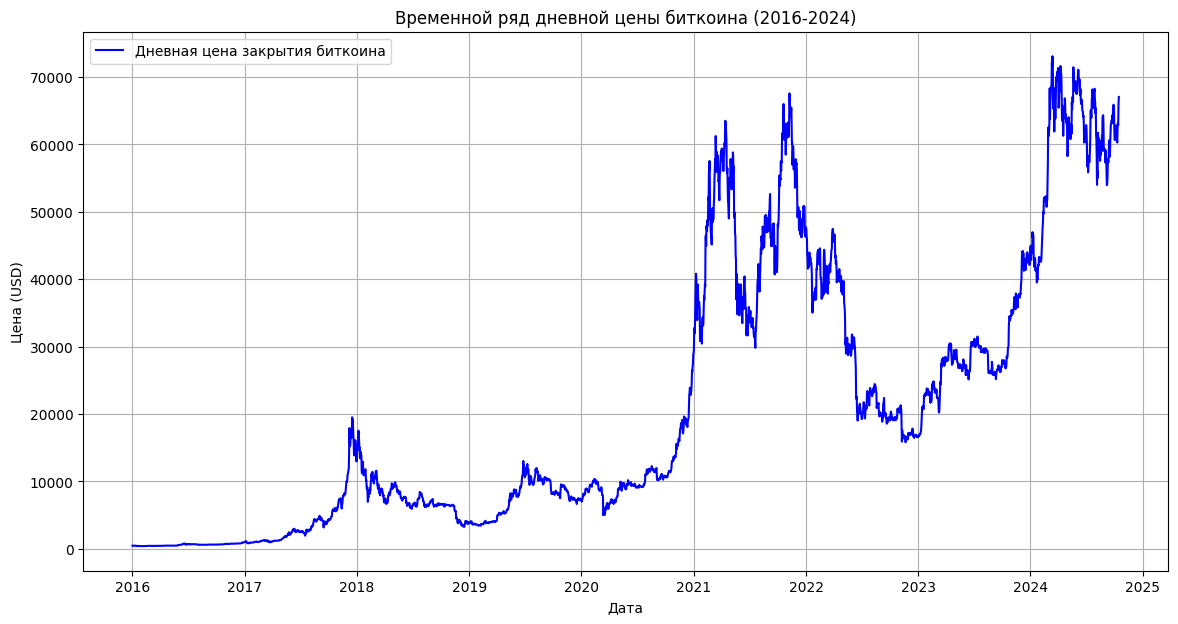

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Определение тикера и периода
ticker = 'BTC-USD'
start_date = '2016-01-01'
end_date = '2024-10-17'  # Текущая дата для прогноза

# 2. Загрузка данных
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# 3. Проверка загруженных данных
print("Первые 5 строк загруженных данных:")
print(data.head())

# 5. Заполнение пропущенных значений методом прямой передачи (forward fill)
data['Close'].fillna(method='ffill', inplace=True)


# 7. Визуализация закрывающей цены после обработки
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Дневная цена закрытия биткоина', color='blue')
plt.title('Временной ряд дневной цены биткоина (2016-2024)')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()


## 3. Реализация класса HoltWinters

Создадим класс HoltWinters, который будет поддерживать как аддитивную, так и мультипликативную модели сезонности.

In [2]:
import numpy as np

class HoltWintersMultiplicative:
    def __init__(self, alpha, beta, gamma, L, n_preds=365):
        """
        Инициализация параметров модели Хольта-Уинтерса (мультипликативная).
        
        :param alpha: Параметр сглаживания уровня
        :param beta: Параметр сглаживания тренда
        :param gamma: Параметр сглаживания сезонности
        :param L: Длина сезона (например, 365 для годовой сезонности)
        :param n_preds: Количество периодов для прогноза
        """
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.L = L
        self.n_preds = n_preds
        self.level = None
        self.trend = None
        self.season = None
        self.fitted = []
        self.residuals = []
    
    def initial_trend(self, series):
        """
        Вычисление начального тренда.
        """
        sum_trend = 0.0
        for i in range(self.L):
            sum_trend += (series[i + self.L] / series[i])
        return (sum_trend / self.L) - 1
    
    def initial_seasonal_components(self, series):
        """
        Вычисление начальных сезонных компонентов.
        """
        season_averages = []
        n_seasons = int(len(series) / self.L)
        for j in range(n_seasons):
            start = self.L * j
            end = start + self.L
            season_avg = np.mean(series[start:end])
            season_averages.append(season_avg)
        
        seasonal = {}
        for i in range(self.L):
            sum_of_vals = 0.0
            for j in range(n_seasons):
                sum_of_vals += series[self.L * j + i] / season_averages[j]
            seasonal[i] = sum_of_vals / n_seasons
        return seasonal
    
    def fit(self, series):
        """
        Обучение модели на временном ряде.
        
        :param series: Временной ряд (список или массив)
        """
        self.level = series[0]
        self.trend = self.initial_trend(series)
        self.season = self.initial_seasonal_components(series)
        
        for i in range(len(series)):
            if i >= self.L:
                seasonal_prev = self.season[i % self.L]
                self.level, self.trend = self.update_level_trend(series[i], seasonal_prev)
                self.season[i % self.L] = self.update_seasonality(series[i], self.level)
            else:
                # Для первых L точек уже инициализированы сезонные компоненты
                pass
            fitted_value = self.level * (1 + self.trend) * self.season[i % self.L]
            self.fitted.append(fitted_value)
            self.residuals.append(series[i] - fitted_value)
    
    def update_level_trend(self, y, seasonal_prev):
        """
        Обновление уровня и тренда.
        """
        level_new = self.alpha * (y / seasonal_prev) + (1 - self.alpha) * (self.level * (1 + self.trend))
        trend_new = self.beta * (level_new / self.level - 1) + (1 - self.beta) * self.trend
        return level_new, trend_new
    
    def update_seasonality(self, y, level_new):
        """
        Обновление сезонной компоненты.
        """
        season_new = self.gamma * (y / level_new) + (1 - self.gamma) * self.season[self.season.keys().__iter__().__next__()]
        return season_new
    
    def predict(self):
        """
        Генерация прогноза на будущие периоды.
        
        :return: Список прогнозных значений
        """
        predictions = []
        for m in range(1, self.n_preds + 1):
            season = self.season[(len(self.fitted) + m -1) % self.L]
            forecast = self.level * (1 + self.trend) * season
            predictions.append(forecast)
        return predictions


Объяснение:

Инициализация `(__init__)`:

Принимает параметры сглаживания (alpha, beta, gamma), длину сезона (L), количество прогнозируемых периодов (n_preds) и тип сезонности (seasonal_type), который может быть либо 'additive', либо 'multiplicative'.

Проверяет корректность значения seasonal_type.

Метод `initial_trend`:

Вычисляет начальный тренд как среднее изменение уровня за первый сезон.

Метод `initial_seasonal_components`:

Вычисляет начальные сезонные компоненты.

Для аддитивной модели сезонные компоненты рассчитываются как среднее отклонение каждого сезона от его среднего значения.

Для мультипликативной модели сезонные компоненты рассчитываются как среднее отношение каждого сезона к его среднему значению.

Метод `fit`:

Обучает модель на предоставленных данных.

Итеративно обновляет уровень (a), тренд (b) и сезонные компоненты (F) для каждого временного периода.

Учёт типа сезонности при обновлении уровней и сезонных компонентов.

Метод `predict`:

Генерирует прогнозные значения на заданное количество периодов вперед (n_preds).

Использует последние значения уровня, тренда и сезонности для построения прогноза.

Метод `get_params`:

Возвращает текущие параметры модели в виде словаря.

Метод `get_fitted_values`:

Возвращает подогнанные (оцененные) значения модели для каждого периода.

Метод `plot_forecast`:

Визуализирует исторические данные, подогнанные значения модели и прогноз.

Автоматически определяет частоту временного ряда для создания будущих дат.


## 4. Обучение модели, прогнозирование и сохранение параметров

In [3]:

train_end_date = '2023-12-31'
forecast_start_date = '2024-01-01'
forecast_end_date = '2024-12-31'  # Прогноз на 2024 год


train_data = data.loc[:train_end_date]['Close']
test_data = data.loc[forecast_start_date:forecast_end_date]['Close']

print(f"Обучающая выборка: {len(train_data)} дней")
print(f"Тестовая выборка: {len(test_data)} дней")

# 1. Определение параметров модели (пока с предположительными значениями)
alpha = 0.5
beta = 0.3
gamma = 0.2
season_length = 365  # Годовая сезонность

# 2. Инициализация модели
hw_model = HoltWintersMultiplicative(alpha, beta, gamma, L=season_length, n_preds=len(test_data))

# 3. Обучение модели
hw_model.fit(train_data.values)

# 4. Генерация прогноза
forecast = hw_model.predict()

# 5. Преобразование прогноза в pandas Series для удобства
forecast_series = pd.Series(forecast, index=test_data.index)


Обучающая выборка: 2922 дней
Тестовая выборка: 289 дней



##### Установка параметров модели:

`alpha, beta, gamma`: Параметры сглаживания уровня, тренда и сезонности соответственно.

`L`: Длина сезона. В данном случае 12, предполагая месячную сезонность.

`n_preds`: Количество периодов для прогноза. Здесь 12, что соответствует одному сезону.

Инициализация и обучение модели:

##### Создаём экземпляр класса HoltWinters с заданными параметрами.

##### Получение подогнанных значений:

Используем метод `get_fitted_values` для получения подогнанных значений модели на обучающих данных.
Прогнозирование:

Используем метод `predict` для генерации прогноза на 12 периодов вперед.

## 5. Визуализация прогноза

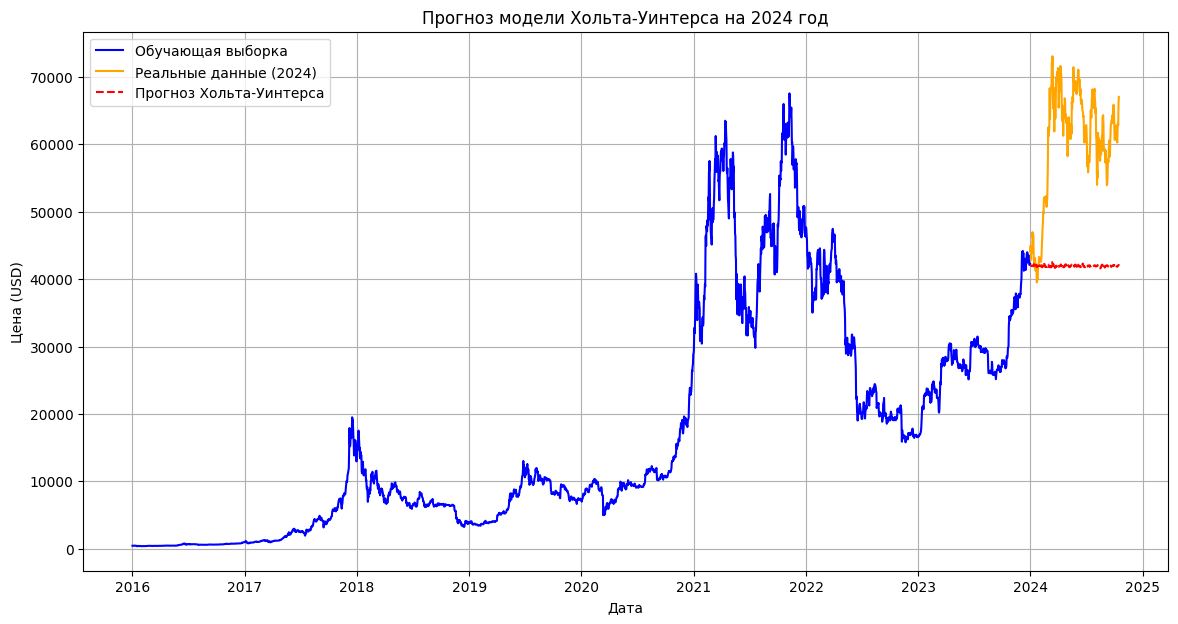

In [4]:
plt.figure(figsize=(14,7))
plt.plot(train_data.index, train_data, label='Обучающая выборка', color='blue')
plt.plot(test_data.index, test_data, label='Реальные данные (2024)', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Прогноз Хольта-Уинтерса', color='red', linestyle='--')
plt.title('Прогноз модели Хольта-Уинтерса на 2024 год')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()


### Сохранение параметров модели в файл

In [5]:
import json

# 1. Получение параметров модели
model_params = {
    'alpha': hw_model.alpha,
    'beta': hw_model.beta,
    'gamma': hw_model.gamma,
    'season_length': hw_model.L
}

# 2. Сохранение параметров в JSON файл
with open('holt_winters_params.json', 'w') as f:
    json.dump(model_params, f, indent=4)

print("Параметры модели сохранены в 'holt_winters_params.json'")


Параметры модели сохранены в 'holt_winters_params.json'


## Реализация тюнинга с помощью Optuna


In [6]:
from sklearn.metrics import mean_squared_error


def objective(trial):
    # 1. Определение гиперпараметров
    alpha = trial.suggest_float('alpha', 0.01, 0.99)
    beta = trial.suggest_float('beta', 0.01, 0.99)
    gamma = trial.suggest_float('gamma', 0.01, 0.99)
    season_length = trial.suggest_categorical('season_length', [7, 14, 30, 60, 90, 180, 365, 730])
    
    # 2. Инициализация модели с текущими параметрами
    model = HoltWintersMultiplicative(alpha, beta, gamma, L=season_length, n_preds=len(test_data))
    
    # 3. Обучение модели на обучающей выборке
    try:
        model.fit(train_data.values)
    except:
        # В случае ошибки возвращаем бесконечную ошибку
        return float('inf')
    
    # 4. Генерация прогноза
    forecast = model.predict()
    forecast_series = pd.Series(forecast, index=test_data.index)
    
    # 5. Вычисление метрики ошибки
    mse = mean_squared_error(test_data, forecast_series)
    
    return mse

import optuna

# Создание и запуск Optuna исследования
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Лучшие параметры
best_params = study.best_params
print('Лучшие параметры:', best_params)


/home/andreykaraulov/.pyenv/versions/3.9.19/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-17 13:10:05,262] A new study created in memory with name: no-name-5cf79d34-b96e-43f8-89c3-73c454e6f74d
[I 2024-10-17 13:10:05,304] Trial 0 finished with value: 815315895.182347 and parameters: {'alpha': 0.3765491876951297, 'beta': 0.51105806385189, 'gamma': 0.6680846627030794, 'season_length': 730}. Best is trial 0 with value: 815315895.182347.
[I 2024-10-17 13:10:05,339] Trial 1 finished with value: 399362646.2596164 and parameters: {'alpha': 0.7253005683881433, 'beta': 0.21565796751731275, 'gamma': 0.2562396056576685, 'season_length': 14}. Best is trial 1 with value: 399362646.2596164.
[I 2024-10-17 13:10:05,368] Trial 2 finished with value: 2308155318.607171 and parameters: {'alpha': 0.60168584346259

Лучшие параметры: {'alpha': 0.14234268980408268, 'beta': 0.6009723742234508, 'gamma': 0.44642084506720536, 'season_length': 180}


In [7]:
# Сохранение лучших параметров в JSON файл
with open('optuna_best_params.json', 'w') as f:
    json.dump(best_params, f, indent=4)

print("Лучшие параметры Optuna сохранены в 'optuna_best_params.json'")


Лучшие параметры Optuna сохранены в 'optuna_best_params.json'


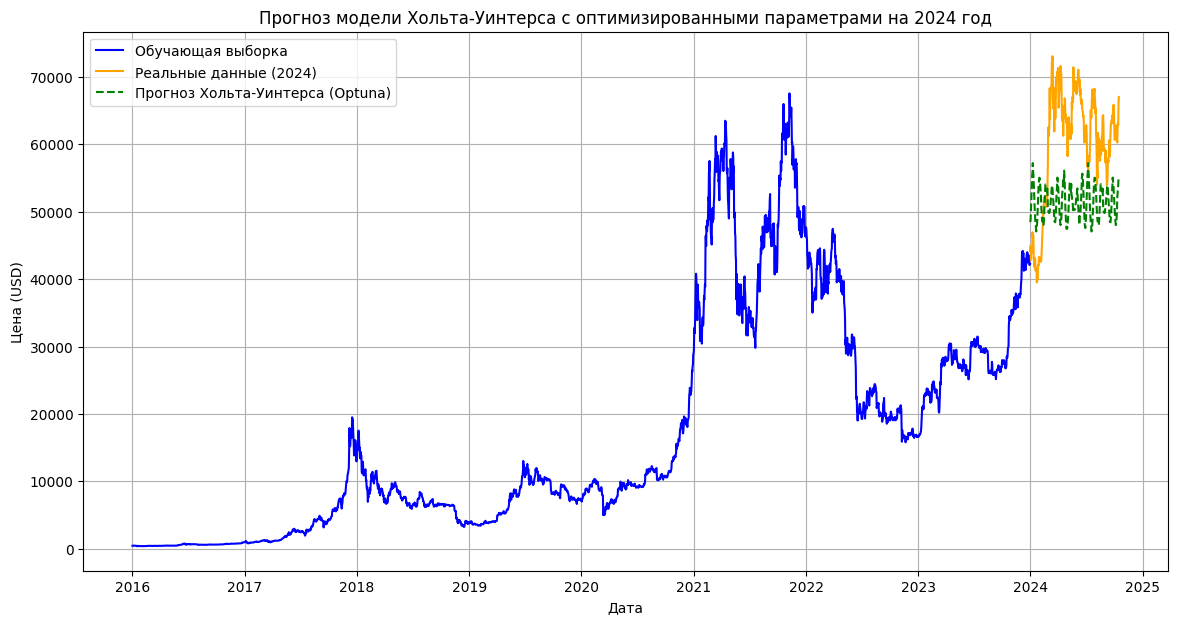

In [8]:
# Инициализация и обучение модели с оптимизированными параметрами
hw_optuna = HoltWintersMultiplicative(
    alpha=best_params['alpha'],
    beta=best_params['beta'],
    gamma=best_params['gamma'],
    L=best_params['season_length'],
    n_preds=len(test_data)
)

hw_optuna.fit(train_data.values)

# Генерация прогноза
forecast_optuna = hw_optuna.predict()
forecast_series_optuna = pd.Series(forecast_optuna, index=test_data.index)
plt.figure(figsize=(14,7))
plt.plot(train_data.index, train_data, label='Обучающая выборка', color='blue')
plt.plot(test_data.index, test_data, label='Реальные данные (2024)', color='orange')
plt.plot(forecast_series_optuna.index, forecast_series_optuna, label='Прогноз Хольта-Уинтерса (Optuna)', color='green', linestyle='--')
plt.title('Прогноз модели Хольта-Уинтерса с оптимизированными параметрами на 2024 год')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()
